In [1]:
# montar o drive
#from google.colab import drive
#drive.mount('/content/drive')

# /content/drive/My Drive/curso_fundamentos_de_deep_learning/09_CNN-ConvolutionalNeuralNetworks/traffic-signs-data.zip

In [2]:
# temos um conjunto de imagens que iremos treinar usando cnn

# importar bibliotecas
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


C:\Users\ricar\AppData\Roaming\Python\Python37\site-packages\requests\__init__.py:91: RequestsDependencyWarning: urllib3 (1.25.9) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)
C:\Users\ricar\AppData\Roaming\Python\Python37\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\ricar\AppData\Roaming\Python\Python37\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\ricar\AppData\Roaming\Python\Python37\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1

In [3]:
roupas_treino_df = pd.read_csv('fashion-mnist-train.csv', sep=',')

# irei usar roupas_teste_df para verificar acurácia do modelo
roupas_teste_df = pd.read_csv('fashion-mnist-test.csv', sep=',')


In [4]:
# Cada linha são 785 entradas
# label é o rótulo
# 784 colunas que são os pixels
roupas_treino_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
roupas_treino_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


In [6]:
roupas_treino_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59999,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
roupas_teste_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
roupas_teste_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 59.9 MB


In [9]:
roupas_teste_df.shape

(10000, 785)

In [10]:
roupas_treino_df.shape

(60000, 785)

In [11]:
treino = np.array(roupas_treino_df, dtype='float32' )

In [12]:
treino

array([[2., 0., 0., ..., 0., 0., 0.],
       [9., 0., 0., ..., 0., 0., 0.],
       [6., 0., 0., ..., 0., 0., 0.],
       ...,
       [8., 0., 0., ..., 0., 0., 0.],
       [8., 0., 0., ..., 0., 0., 0.],
       [7., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [13]:
teste = np.array(roupas_teste_df, dtype='float32' )

In [14]:
teste

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [2., 0., 0., ..., 0., 0., 0.],
       ...,
       [8., 0., 0., ..., 0., 1., 0.],
       [8., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [15]:
teste.shape

(10000, 785)

In [16]:
treino.shape

(60000, 785)

7.0


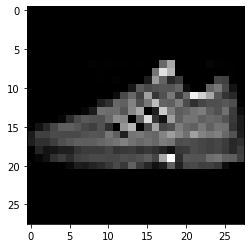

In [17]:
import random
indice=1
indice=random.randint(1,60000)
print(treino[indice,0])
img_roupa = treino[indice,1:].reshape(28,28)
plt.imshow(img_roupa, cmap='gray')

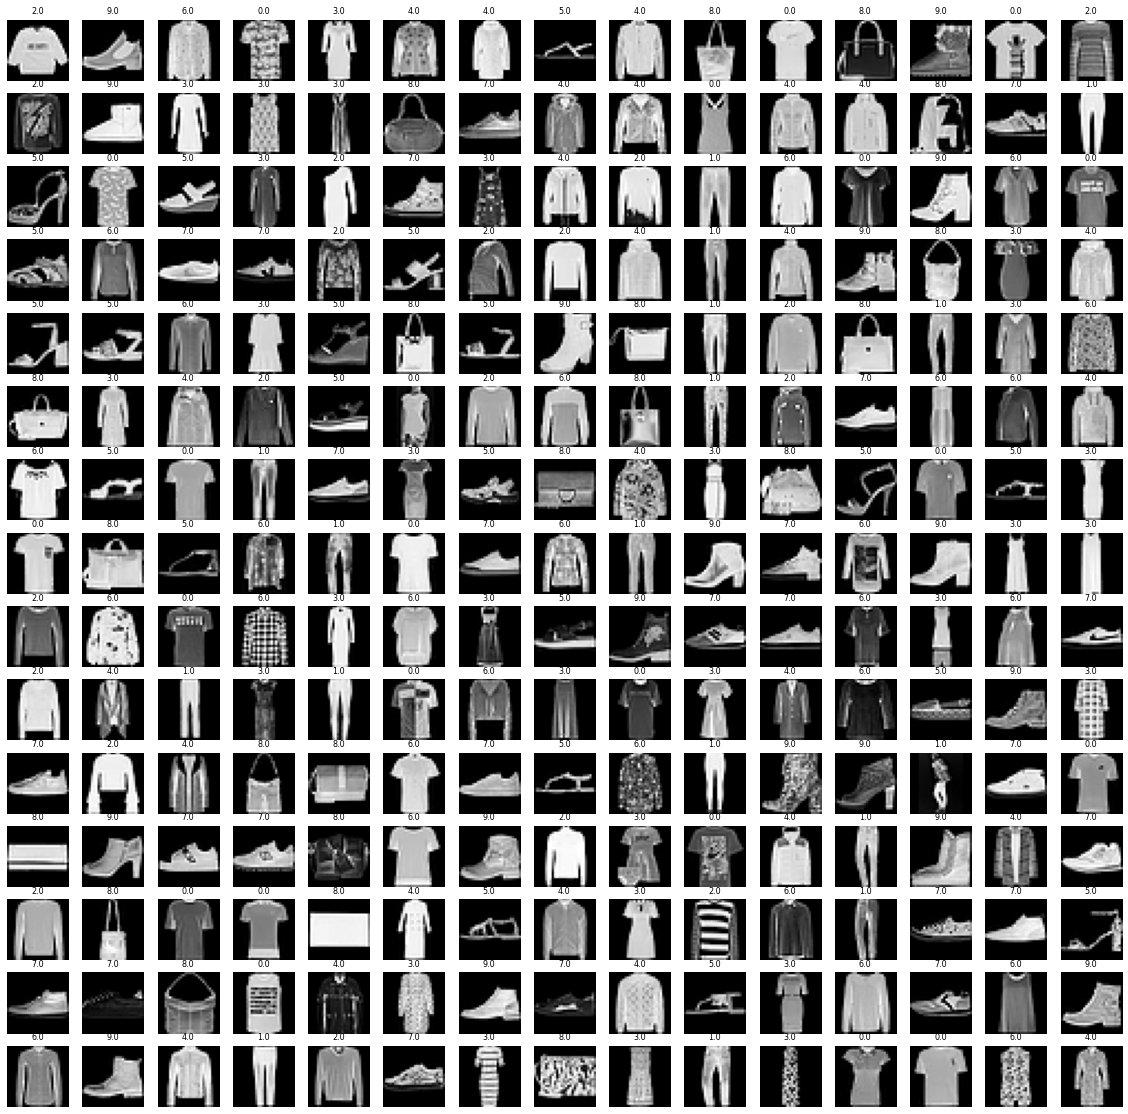

In [18]:
largura= 15
altura= 15

fig, img = plt.subplots(largura, altura, figsize=(20,20))
img = img.ravel()

num_treino = len(treino)

for i in np.arange(0, largura*altura):
  indice = np.random.randint(0, num_treino)
  img[i].imshow(treino[i,1:].reshape(28,28), cmap='gray')
  img[i].set_title(treino[i,0], fontsize=8)
  img[i].axis('off')


In [19]:
# as imagens estão da coluna 1 em diante
# estou dividindo por 255 para que cada valor esteja entre 0 e 1

X_treino = treino[:, 1:] / 255
y_treino = treino[:,0]

In [20]:
X_treino[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [21]:
y_treino[0]

2.0

In [22]:
X_teste = teste[:, 1:] / 255

In [23]:
X_teste[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.03529412, 0.03137255, 0.        ,
       0.        , 0.13333334, 0.11372549, 0.02745098, 0.        ,
       0.04313726, 0.09411765, 0.        , 0.        , 0.01176471,
       0.01176471, 0.00392157, 0.        , 0.00392157, 0.00392157,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.01568628, 0.        , 0.        , 0.00392157, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.17254902,
       0.34509805, 0.3882353 , 0.47843137, 0.48235294, 0.3137255 ,
       0.        , 0.        , 0.        , 0.        , 0.00392157,
       0.00392157, 0.00392157, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.00392157, 0.00784314,
       0.        , 0.        , 0.        , 0.01176471, 0.18039216,
       0.68235296, 0.9764706 , 0.2627451 , 0.        , 0.36862746,
       0.8235294 , 0.23921569, 0.05490196, 0.83137256, 0.61568

In [24]:
y_teste = teste[:,0]

In [25]:
y_teste[0]

0.0

In [26]:
y_treino

array([2., 9., 6., ..., 8., 8., 7.], dtype=float32)

In [27]:
X_teste.shape

(10000, 784)

In [28]:
X_treino.shape

(60000, 784)

In [29]:
X_treino.shape[0]

60000

In [30]:
X_treino.shape

(60000, 784)

In [31]:
X_treino[0].shape

(784,)

In [32]:
X_treino_reshape = X_treino.reshape(60000, *(28,28,1) ) # 28x28 e 1 canal de escala de cinza

#Pode ser também no formato abaixo
# A função do asterisco é desconstruir objetos como listas e tuplas na chamada de funções e métodos, 
# onde cada elemento será passado como argumento.
#X_treino_reshape1 = X_treino.reshape(60000,  28, 28, 1)


In [33]:
# formato tem que ser linhaxcoluna e cores (se 1 for eh pq eu treino com tons de cinza, 
# se 3 sera pq vc treinou a cnn com imagens coloridas) 
X_treino_reshape.shape

(60000, 28, 28, 1)

In [34]:
X_teste.shape[0]

10000

In [35]:
X_teste_reshape = X_teste.reshape(X_teste.shape[0], *(28,28,1) ) # 28x28 e 1 canal de escala de cinza

In [36]:
X_teste_reshape.shape

(10000, 28, 28, 1)

In [37]:
# Enfim posso construir o modelo da rede neural convolucional
from tensorflow.keras import layers, models

modelo_predicao_roupa = models.Sequential()

# input_shape continua a mesma idéia do que aprendemos antes, 
# input_shape=(28,28,1)

# Etapa1 - camada de convolução
# filters=32, kernel_size=(3,3) posso informar o que eu desejar
modelo_predicao_roupa.add(  layers.Conv2D( filters=32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1) ) )

# Etapa2 - camada Pooling
modelo_predicao_roupa.add ( layers.MaxPooling2D(2,2)  )

# camada de convolução
modelo_predicao_roupa.add( layers.Conv2D( filters=64, kernel_size=(3,3), activation='relu'  ) )

# camada Pooling
modelo_predicao_roupa.add ( layers.MaxPooling2D(2,2)  )

# Comentário apenas para teste e informando e pode ajudar a evitar sobreajustamento
#modelo_predicao_roupa.add(tf.keras.layers.Dropout(0.2))

# camada de convolução
modelo_predicao_roupa.add( layers.Conv2D( filters=64, kernel_size=(3,3), activation='relu'  ) )

# Etapa 3 - Flattening
modelo_predicao_roupa.add( layers.Flatten()  )




# Etapa 4 - Rede neural densa
# units=64 é da camada oculta
modelo_predicao_roupa.add(  layers.Dense( units=64, activation='relu' )  )

# A última camada será a saída
modelo_predicao_roupa.add(  layers.Dense(units=10, activation='softmax')  )



In [38]:
modelo_predicao_roupa.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [39]:
# One Hot Encoder 0 a 9
# Quando não usar o formato acima pode usar sparse_categorical_crossentropy
modelo_predicao_roupa.compile(optimizer='Adam', metrics=['accuracy'], loss='sparse_categorical_crossentropy')

In [40]:
X_treino_reshape.shape

(60000, 28, 28, 1)

In [41]:
y_treino[0]

2.0

In [42]:
epocas = 3

historico_epocas = modelo_predicao_roupa.fit(X_treino_reshape, y_treino, batch_size=512, epochs=epocas)

Epoch 1/3
118/118 [==============================] - 34s 291ms/step - loss: 0.8912 - accuracy: 0.6746
Epoch 2/3
118/118 [==============================] - 35s 300ms/step - loss: 0.5277 - accuracy: 0.8050
Epoch 3/3
118/118 [==============================] - 29s 243ms/step - loss: 0.4345 - accuracy: 0.8441


In [43]:
avaliacao = modelo_predicao_roupa.evaluate(X_teste_reshape, y_teste)

# loss: 0.4034 - accuracy: 0.8534

313/313 [==============================] - 3s 10ms/step - loss: 0.3972 - accuracy: 0.8597


In [44]:
y_teste

array([0., 1., 2., ..., 8., 8., 1.], dtype=float32)

In [45]:
avaliacao

[0.3972098231315613, 0.8597000241279602]

In [46]:
predicao_classes = modelo_predicao_roupa.predict(X_teste_reshape)


In [47]:
predicao_classes

array([[9.5421410e-01, 4.1585008e-06, 3.2739839e-04, ..., 2.1782772e-11,
        2.7690578e-04, 3.0261496e-10],
       [2.2566422e-07, 9.9998343e-01, 2.0500199e-09, ..., 5.4106671e-11,
        3.0417610e-08, 8.9153142e-13],
       [8.0974415e-02, 1.0040489e-04, 6.7806286e-01, ..., 1.8639864e-07,
        4.3011663e-04, 2.3120108e-06],
       ...,
       [1.8297420e-06, 1.9513291e-10, 3.8011411e-05, ..., 1.8103636e-05,
        9.9988329e-01, 2.6748360e-06],
       [3.6421072e-02, 5.1000527e-05, 2.4090849e-02, ..., 1.4345423e-07,
        8.0282557e-01, 9.2317568e-06],
       [4.3860976e-02, 2.9862966e-02, 3.5543084e-01, ..., 1.1573589e-07,
        9.0725878e-03, 1.9201821e-06]], dtype=float32)

In [48]:
#int(np.max(predicao_classes[0]))

i = 6
print(np.where(predicao_classes[i] == np.max(predicao_classes[i]))[0][0] , y_teste[i])


8 8.0


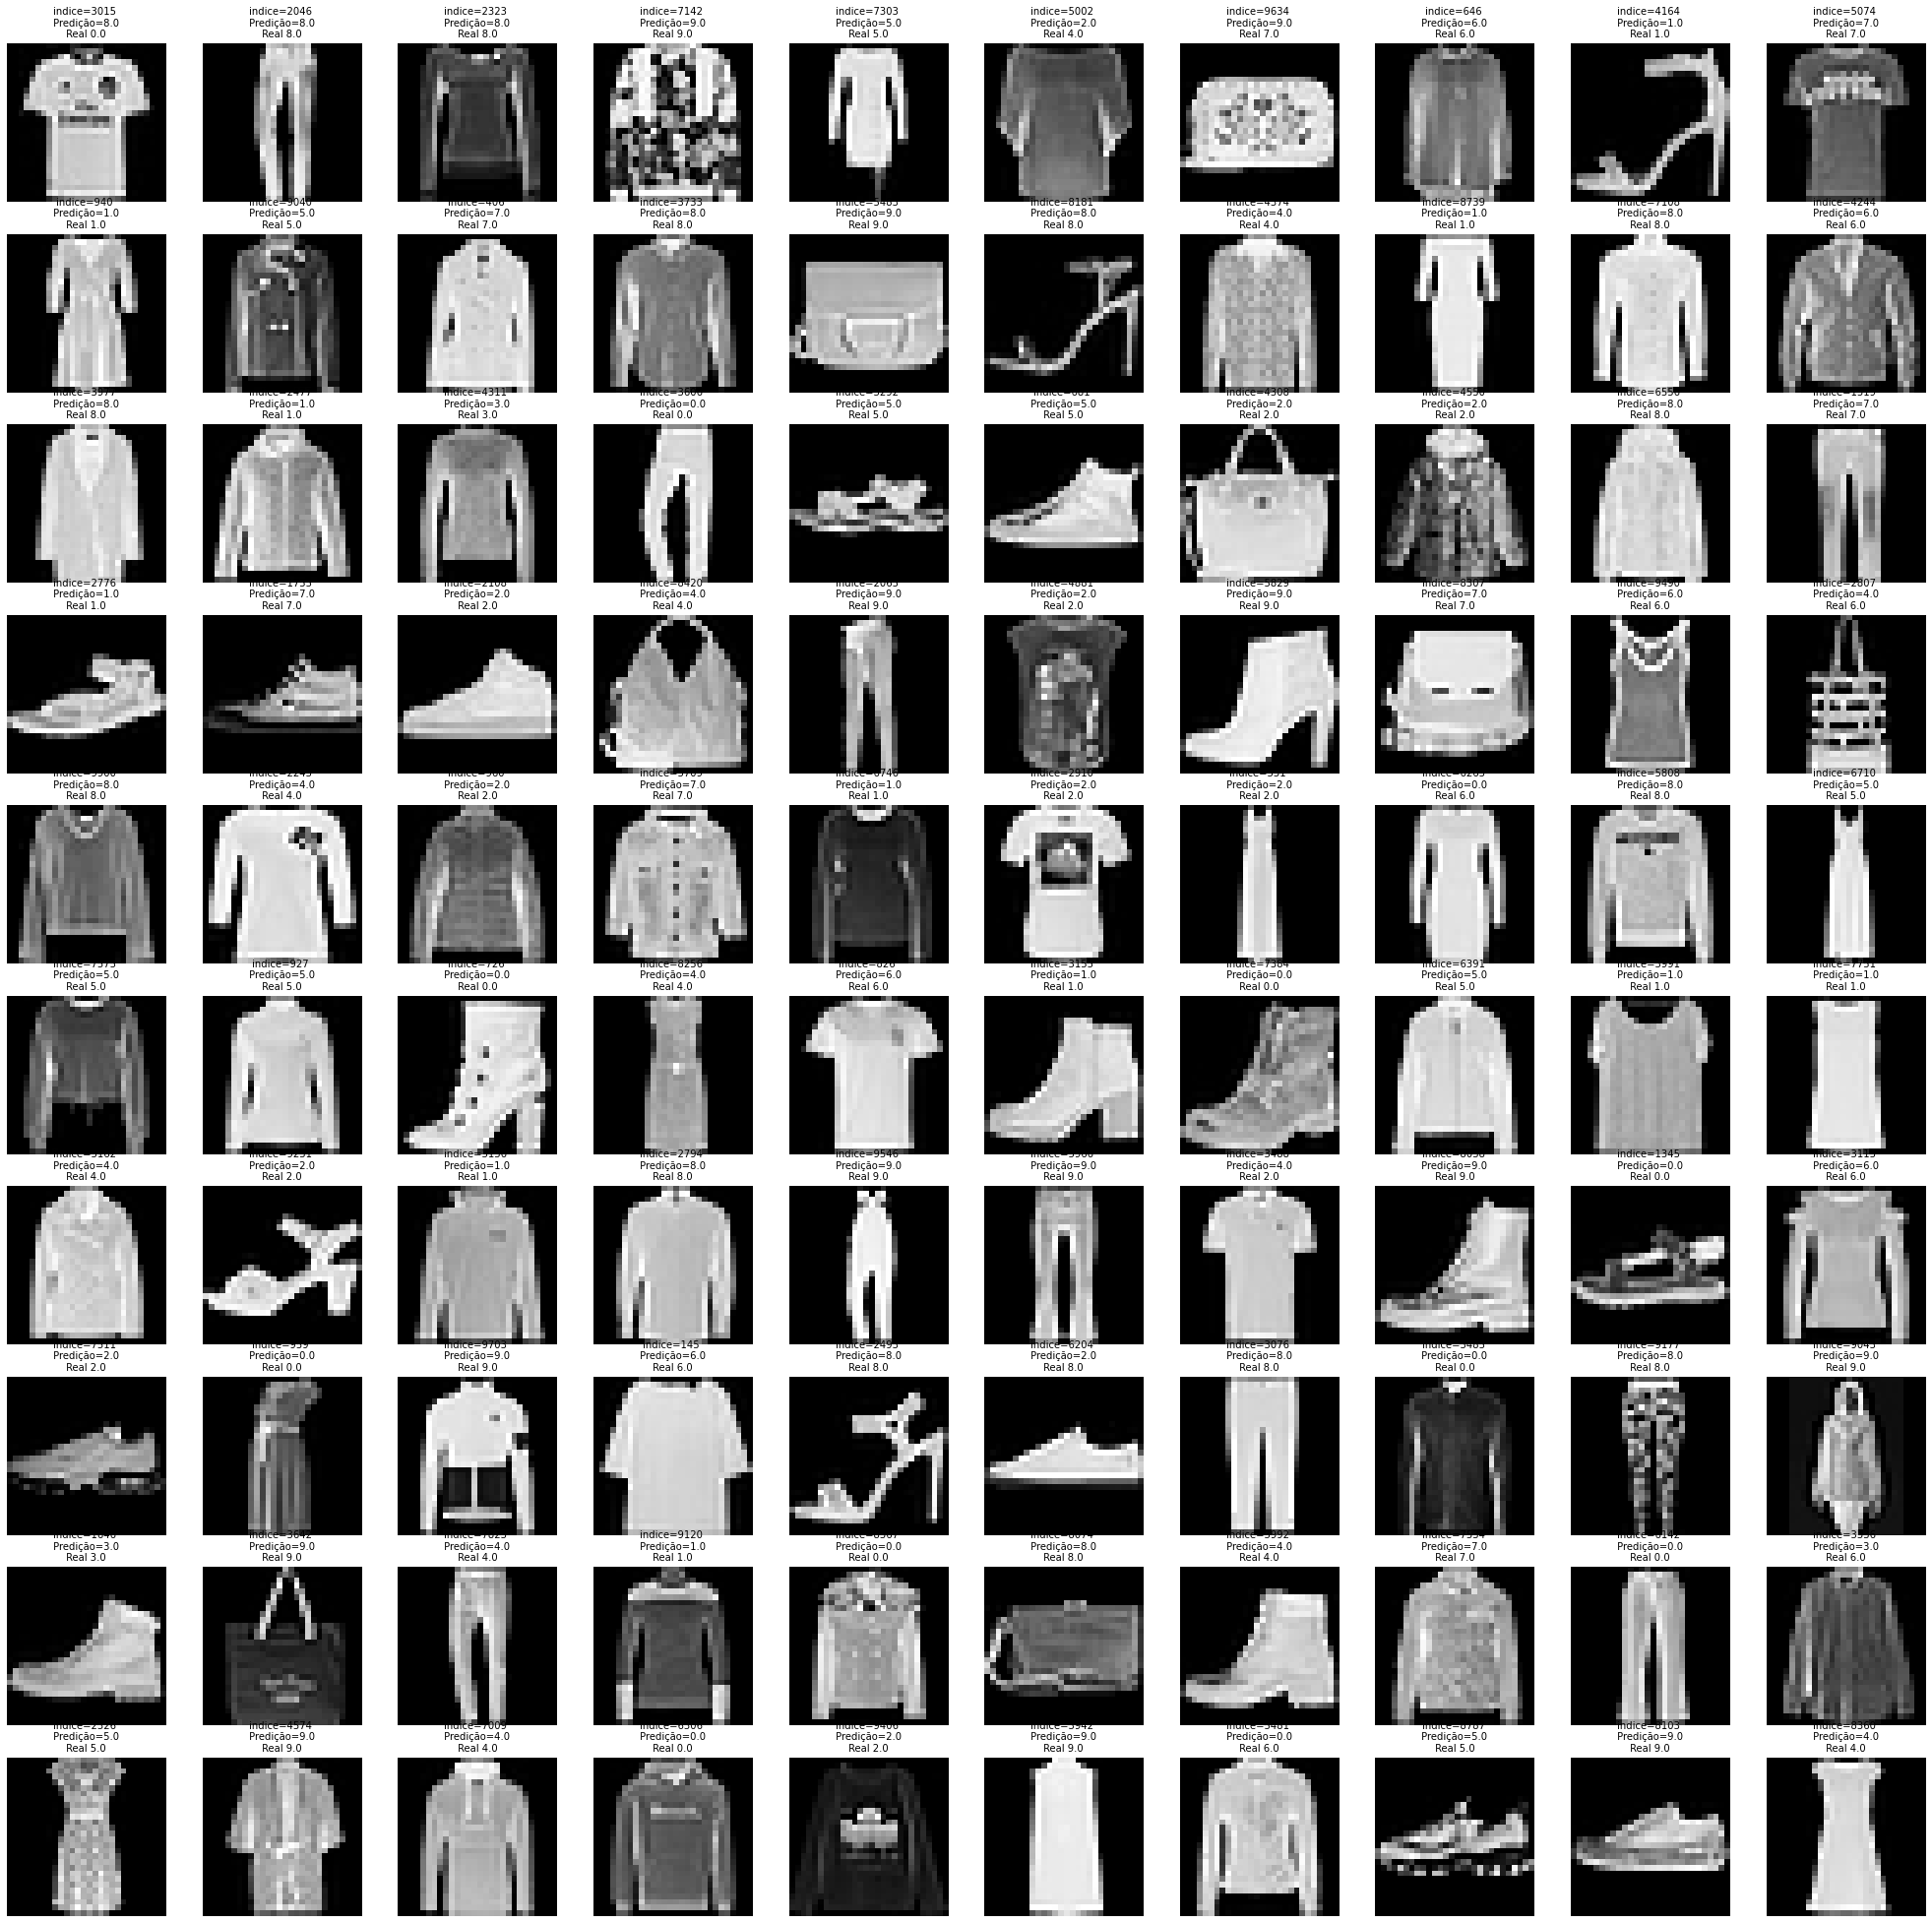

In [49]:
def indice_pred(pred, i):
    res = np.where(pred[i] == np.max(pred[i]))
    return res

largura= 10
altura= 10

fig, img = plt.subplots(largura, altura, figsize=(35,35))
img = img.ravel()

num_teste = len(teste)

for i in np.arange(0, largura*altura):
    indice = np.random.randint(0, num_teste)
    img[i].imshow(teste[i,1:].reshape(28,28), cmap='gray')
    classe_pred=indice_pred(predicao_classes, indice)
    img[i].set_title("indice={} \n Predição={:0.1f} \n Real {:0.1f} ".format(indice, classe_pred[0][0], y_teste[indice]), fontsize=10)
    img[i].axis('off')